In [5]:
# neural network for predicting house prices

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
housing = fetch_california_housing()

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [11]:
# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [12]:
# output layer should be a single neuron, as we only want to predict a single value
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [14]:
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.4780
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4170 - val_loss: 0.4395
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3949 - val_loss: 0.3990
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3813 - val_loss: 0.4002
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3722 - val_loss: 0.3875
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3641 - val_loss: 0.3822
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3635 - val_loss: 0.3779
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3566 - val_loss: 0.3826
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3562 - val_loss: 0.4362
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3533 - val_loss: 0.3649

In [15]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 888us/step - loss: 0.4935


In [16]:
X_new = X_test[:3]

In [18]:
y_pred = model.predict(X_new)

In [19]:
y_pred

array([[2.2709265],
       [1.4689388],
       [1.5482466]], dtype=float32)

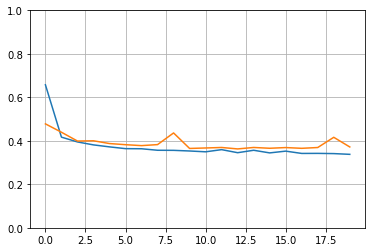

In [22]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()